In [1]:
import pandas as pd
import seaborn as sns; sns.set_style("whitegrid")

In [2]:
data = pd.read_json('all_results.json')
data.index.name = 'fold'
data = data.reset_index()
data['fold'] += 1

In [3]:
def make_plot(cols):
    
    melted_data = data.melt(
        id_vars='fold',
        value_vars=cols)
    
    g = sns.factorplot(
        x="fold", y="value", kind='point',
        hue='variable', data=melted_data, size=10,
        saturation=.5)
    
#     g.set(ylim=(0.8,.9))
    return g

In [4]:
cols = [
    'compliant_f1', 'compliant_precision', 'compliant_recall',
    'noncompliant_f1', 'noncompliant_precision', 'noncompliant_recall',
    'safe_f1', 'safe_precision', 'safe_recall']

In [51]:
# cols= ['compliant_f1', 'noncompliant_f1', 'safe_f1']
melted_df = data.melt(
        id_vars='fold',
        value_vars=cols)

In [52]:
melted_df.head()

,fold,variable,value
0,1,compliant_f1,0.0
1,2,compliant_f1,0.0
2,3,compliant_f1,0.0
3,4,compliant_f1,0.0
4,5,compliant_f1,0.0


In [53]:
new = melted_df.variable.str.split('_', expand=True)
new.columns = ['class', 'metric']

In [54]:
df = pd.concat([melted_df, new], axis=1)

In [56]:
df.head()

,fold,variable,value,class,metric
0,1,compliant_f1,0.0,compliant,f1
1,2,compliant_f1,0.0,compliant,f1
2,3,compliant_f1,0.0,compliant,f1
3,4,compliant_f1,0.0,compliant,f1
4,5,compliant_f1,0.0,compliant,f1


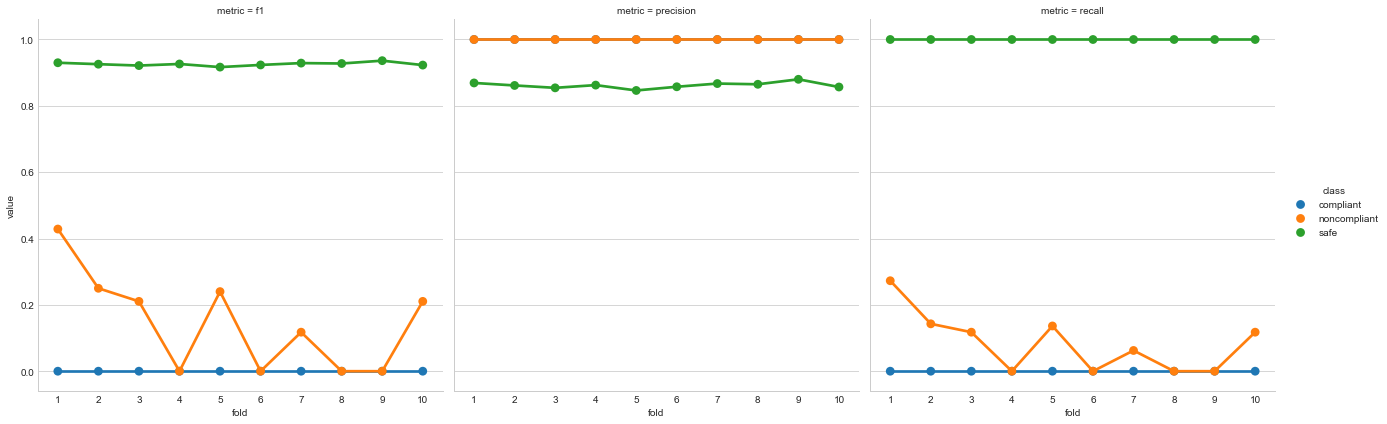

In [63]:
g = sns.factorplot(
    x="fold", y="value",
    col='metric', hue='class',
    data=df, size=6)

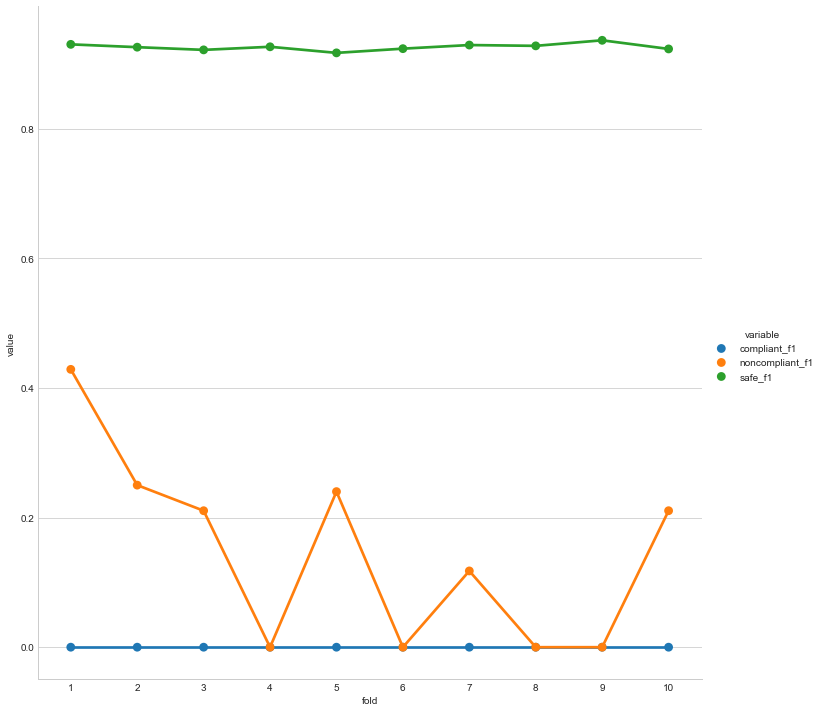

In [64]:
cols= ['compliant_f1', 'noncompliant_f1', 'safe_f1']
make_plot(cols)

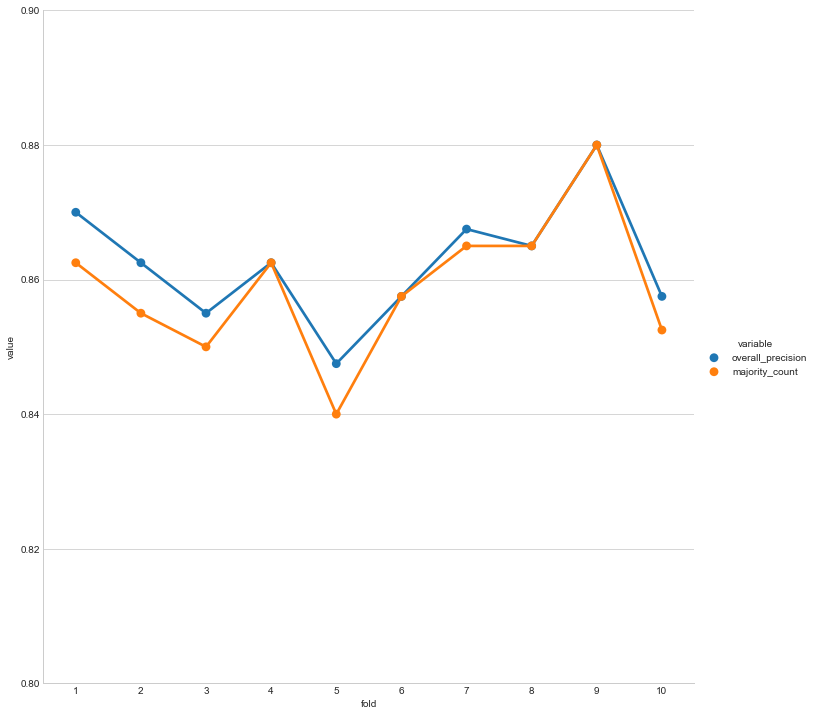

In [39]:
cols = ['overall_precision', 'majority_count']
make_plot(cols)